In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.shape

(11162, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


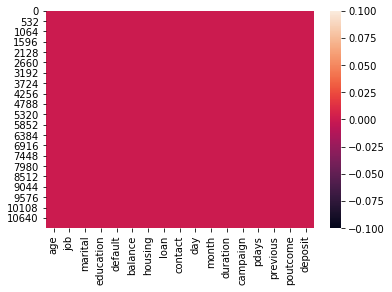

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
X=df.drop("deposit",axis=1)
Y=df["deposit"]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
#create user fined object
def create_model(model):
    model.fit(X_train,Y_train)#train the model
    Y_pred=model.predict(X_test)#test the model
    print(classification_report(Y_pred,Y_test))
    print(confusion_matrix(Y_pred,Y_test))
    return model

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr= LogisticRegression()

In [28]:
#call function
create_model(lr)


              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1827
           1       0.73      0.76      0.75      1522

    accuracy                           0.77      3349
   macro avg       0.76      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349

[[1402  425]
 [ 358 1164]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#here recall is 0.76 means 76% means good score but we try >95
#decision tree help to select imp feature for prediction
#call decision tree classifire
from sklearn.tree import DecisionTreeClassifier

In [30]:
#create object
dt1=DecisionTreeClassifier()

In [32]:
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1770
           1       0.78      0.78      0.78      1579

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

[[1416  354]
 [ 344 1235]]


In [34]:
dt1.feature_importances_

array([0.08042653, 0.03734714, 0.01861403, 0.01433111, 0.00045636,
       0.08394047, 0.04235646, 0.00730395, 0.06182974, 0.0724432 ,
       0.09917509, 0.34820047, 0.02340922, 0.04791883, 0.02595937,
       0.03628804])

In [35]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

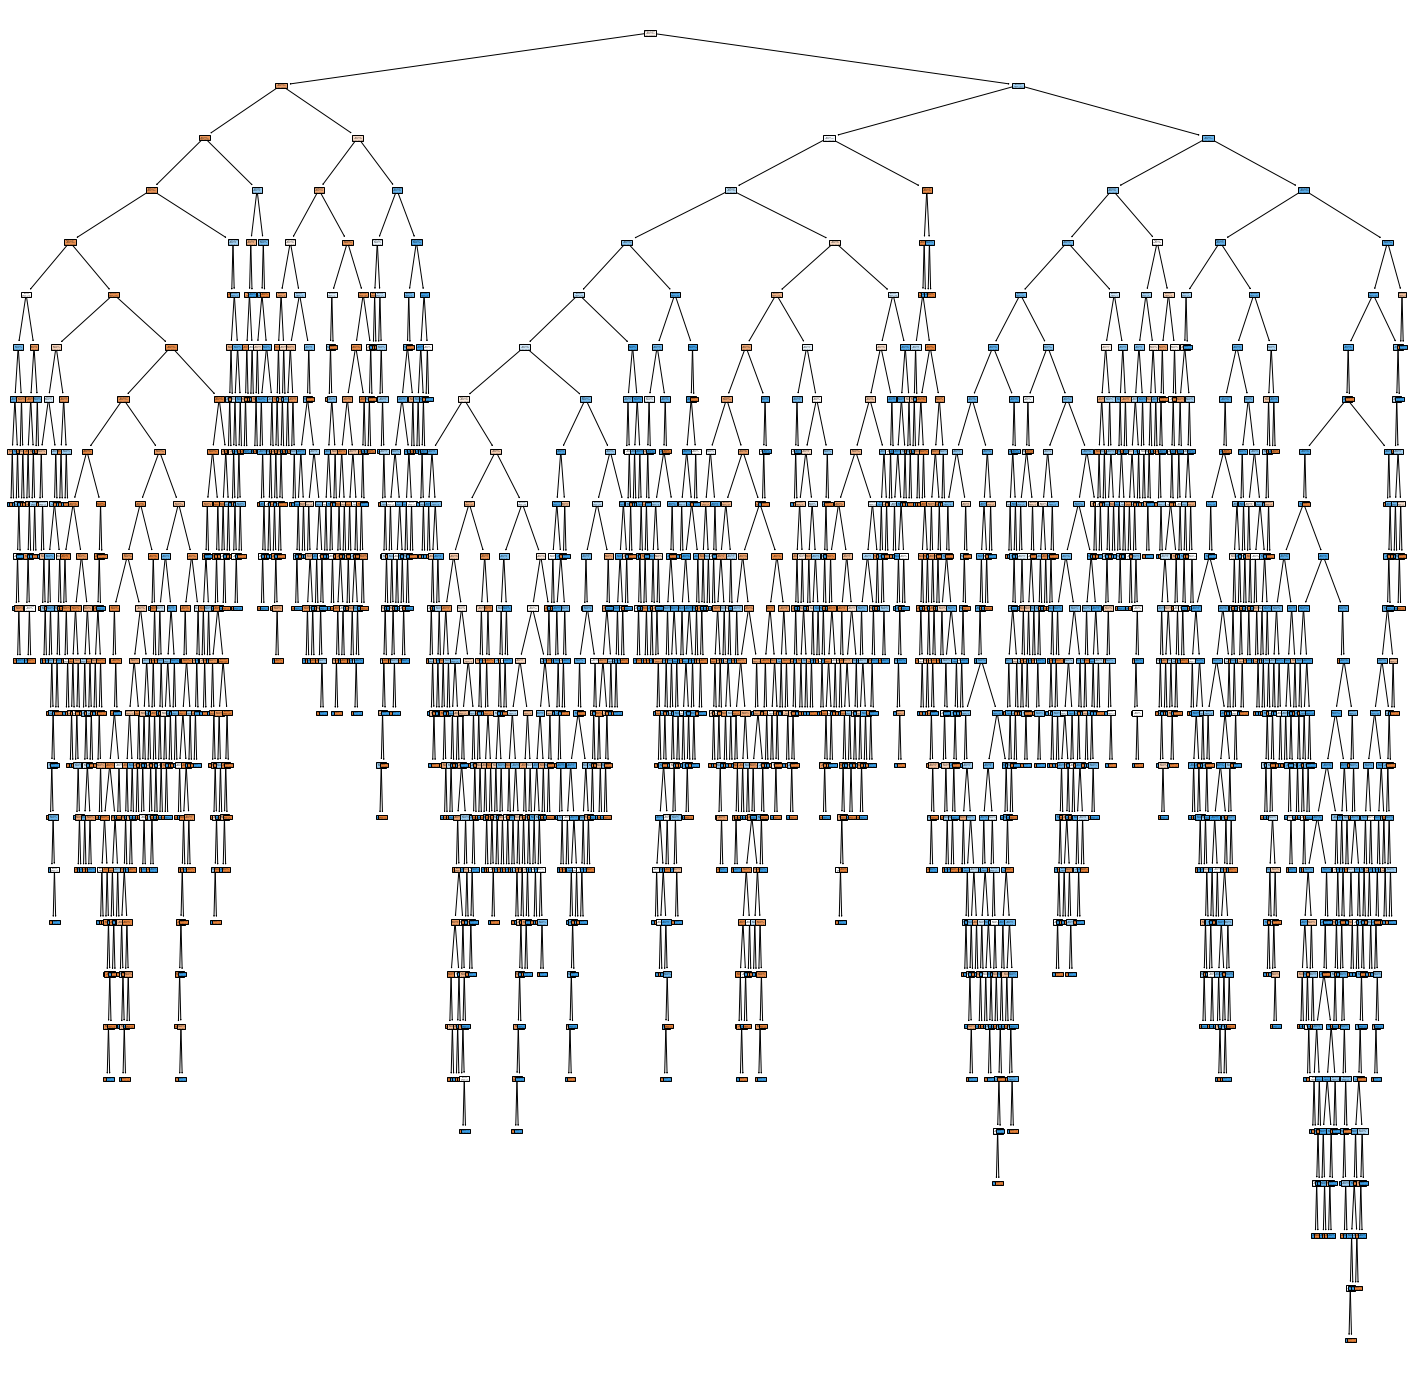

In [41]:
#create tree
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(25,25))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [49]:
#we got less score not excellent;
#model is overfitting reduced over fitting situation
#two types of purning technique
#1.max_depth inbuild parameter
#2.min_samples_leaf inbuild parameter
#max_depth cannot more than 8
dt2=DecisionTreeClassifier(max_depth=6)

In [50]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1613
           1       0.84      0.76      0.80      1736

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1352  261]
 [ 408 1328]]


In [51]:
dt2.feature_importances_

array([0.047968  , 0.        , 0.        , 0.00261286, 0.        ,
       0.00751929, 0.07479213, 0.00344582, 0.10966343, 0.01086635,
       0.05108988, 0.53946911, 0.        , 0.07203978, 0.00072607,
       0.07980728])

In [52]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

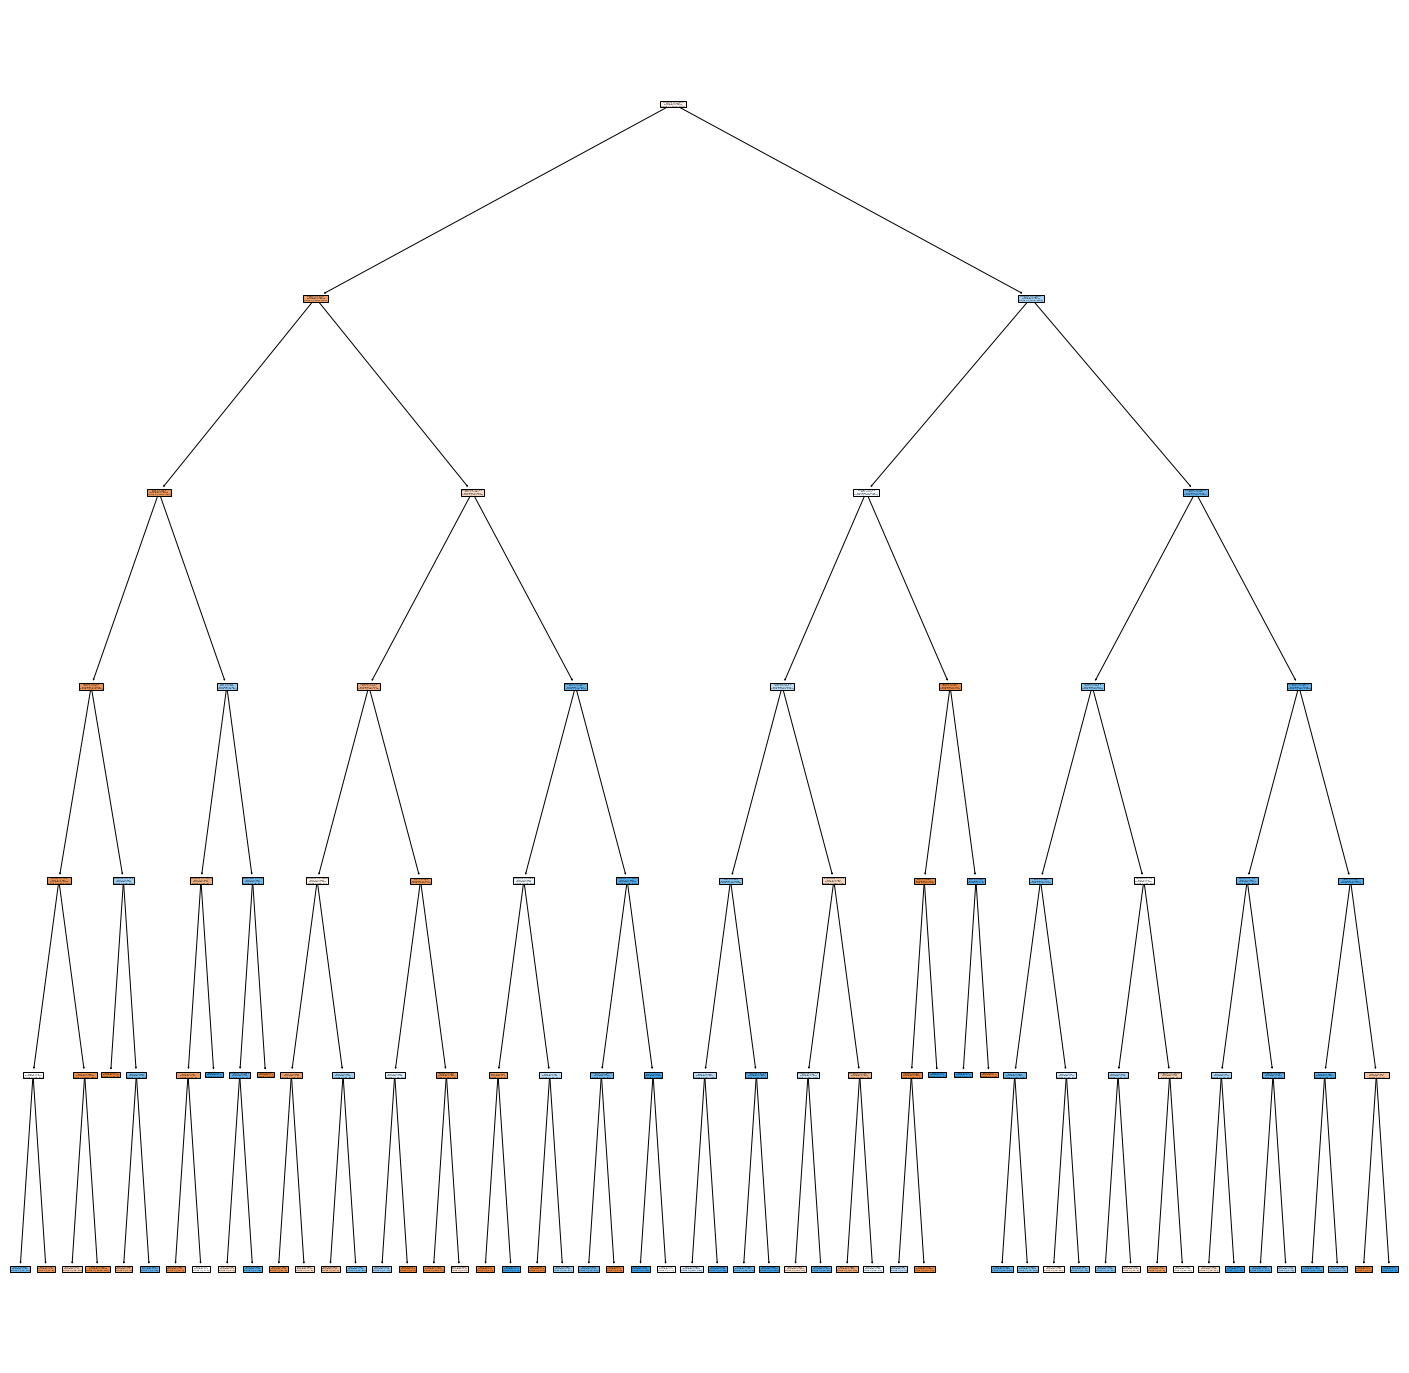

In [53]:
#create tree
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(25,25))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

In [56]:
dt3=DecisionTreeClassifier(min_samples_leaf=50)
#min_samples_leaf=50 or more tjan 50

In [57]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1582
           1       0.87      0.78      0.83      1767

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1378  204]
 [ 382 1385]]


In [58]:
dt3.feature_importances_

array([4.36918907e-02, 4.95240256e-03, 0.00000000e+00, 2.72000182e-03,
       0.00000000e+00, 1.83109135e-02, 6.87021002e-02, 3.16524343e-03,
       1.06134282e-01, 4.28386407e-03, 1.09344494e-01, 4.98980114e-01,
       3.79287934e-04, 6.58207343e-02, 0.00000000e+00, 7.35146712e-02])

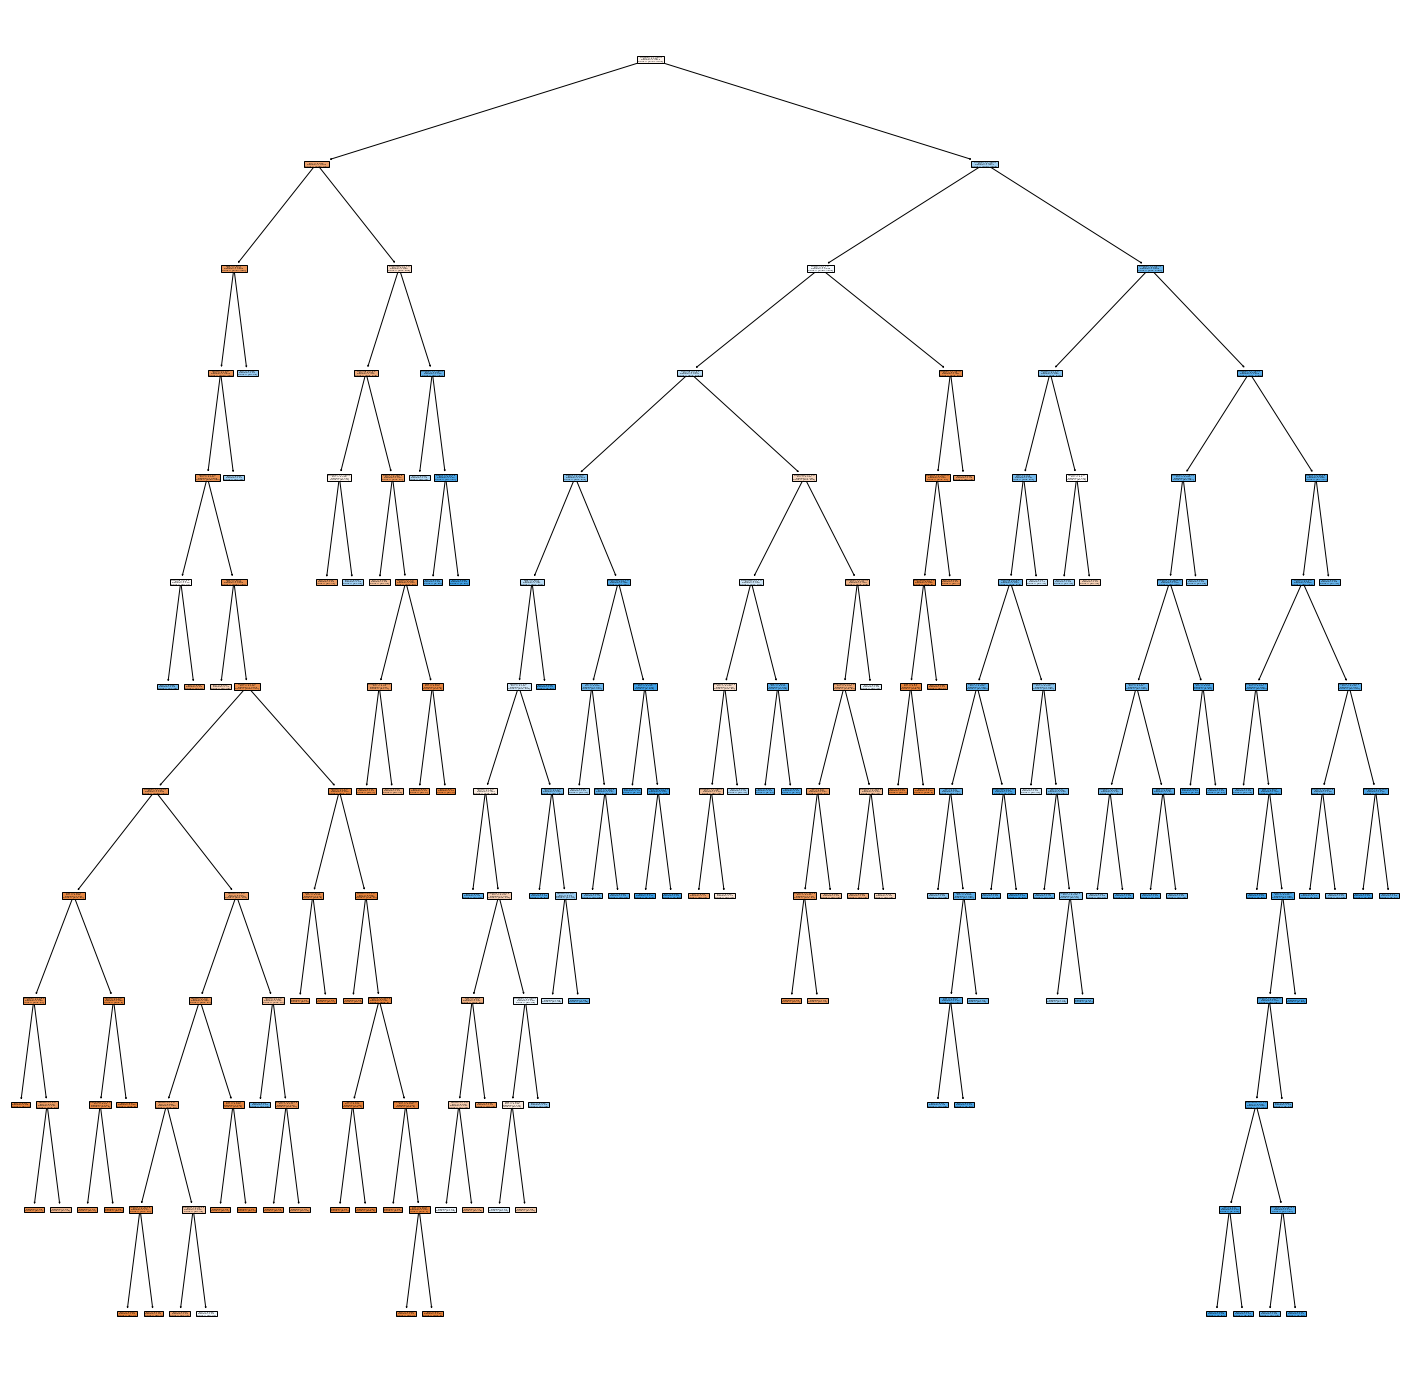

In [59]:
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(25,25))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [60]:
#use entropy method
dt4=DecisionTreeClassifier(criterion="entropy",min_samples_leaf=50)


In [61]:
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1735
           1       0.82      0.81      0.81      1614

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

[[1450  285]
 [ 310 1304]]


In [ ]:
#here giniindex method is best.and purning min_samp0les_leaf=50.